# 06-16-Sklearn 实现SVM2 输出常用属性值

In [12]:
# 使用numpy 读取数据集
import numpy as np

def load_data(file_name):
    data = np.loadtxt(file_name, delimiter='\t')
    X = data[:, :-1]
    y = data[:, -1]
    return X, y

In [13]:
# load data
X,y = load_data('data/svm3.txt')

In [14]:
# 建立SVM 分类器并输出常用属性值
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1.0)
model.fit(X, y)
print("支持向量的个数：", model.n_support_)
print("支持向量在样本中的索引：", model.support_)
print("支持向量对应的标签：", model.support_vectors_)
print("支持向量的alpha值：", model.dual_coef_)

print("支持向量机的评估分数：", model.score(X, y))

支持向量的个数： [37 37]
支持向量在样本中的索引： [ 0  1  2  4  5  6  8 11 12 13 14 15 16 17 18 20 21 22 23 24 25 26 27 28
 29 32 33 35 36 37 38 41 42 45 46 47 49 50 51 53 54 56 58 60 61 62 63 64
 65 66 69 71 73 74 76 77 78 82 83 84 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
支持向量对应的标签： [[7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [6.6 2.9]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.8 2.7]
 [6.  2.7]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [6.1 3. ]
 [5.8 2.6]
 [5.7 3. ]
 [5.7 2.9]
 [6.2 2.9]
 [5.7 2.8]
 [6.3 3.3]
 [5.8 2.7]
 [6.3 2.9]
 [6.5 3. ]
 [4.9 2.5]
 [6.7 2.5]
 [6.5 3.2]
 [6.4 2.7]
 [6.8 3. ]
 [5.7 2.5]
 [5.8 2.8]
 [6.4 3.2]
 [6.5 3. ]
 [6.  2.2]
 [5.6 2.8]
 [6.3 2.7]
 [6.7 3.3]
 [6.2 2.8]
 [6.1 3. ]
 [6.4 2.8]
 [6.4 2.8]
 [6.3 2.8]
 [6.1 2.6]
 [6.3 3.4]
 [6.4 3.1]
 [6.  3. ]
 [6.9 3.1]
 [6.7 3.1]
 [6.9 3.1]
 [5.8 

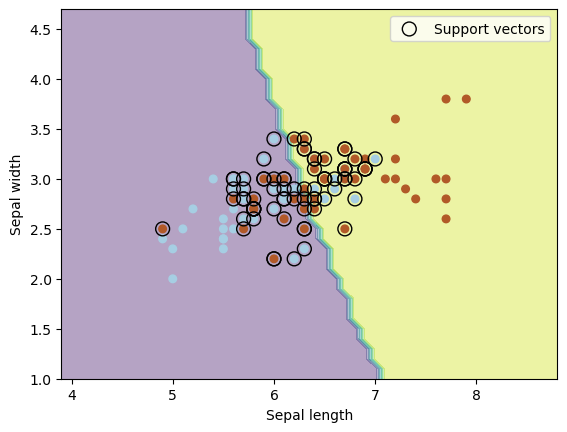

In [15]:
# 数据可视化
# 绘制分割超平面
import matplotlib.pyplot as plt
fig2 = plt.figure()

# 画决策边界
h = .1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


# 绘制支持向量
sv = model.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='k', label='Support vectors')


plt.legend()
plt.show()

In [16]:
h = .1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [23]:
def draw_svm(params):
    svm = SVC(kernel=params[0], C=params[1], gamma=params[2])
    svm.fit(X, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    sv = model.support_vectors_
    #plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='k', label='Support vectors')
    score =model.score(X, y)
    title = 'C={1:.2f}, gamma={2:.2f},score={0:.2f}'.format(params[1], params[2],score)
    plt.title(title)


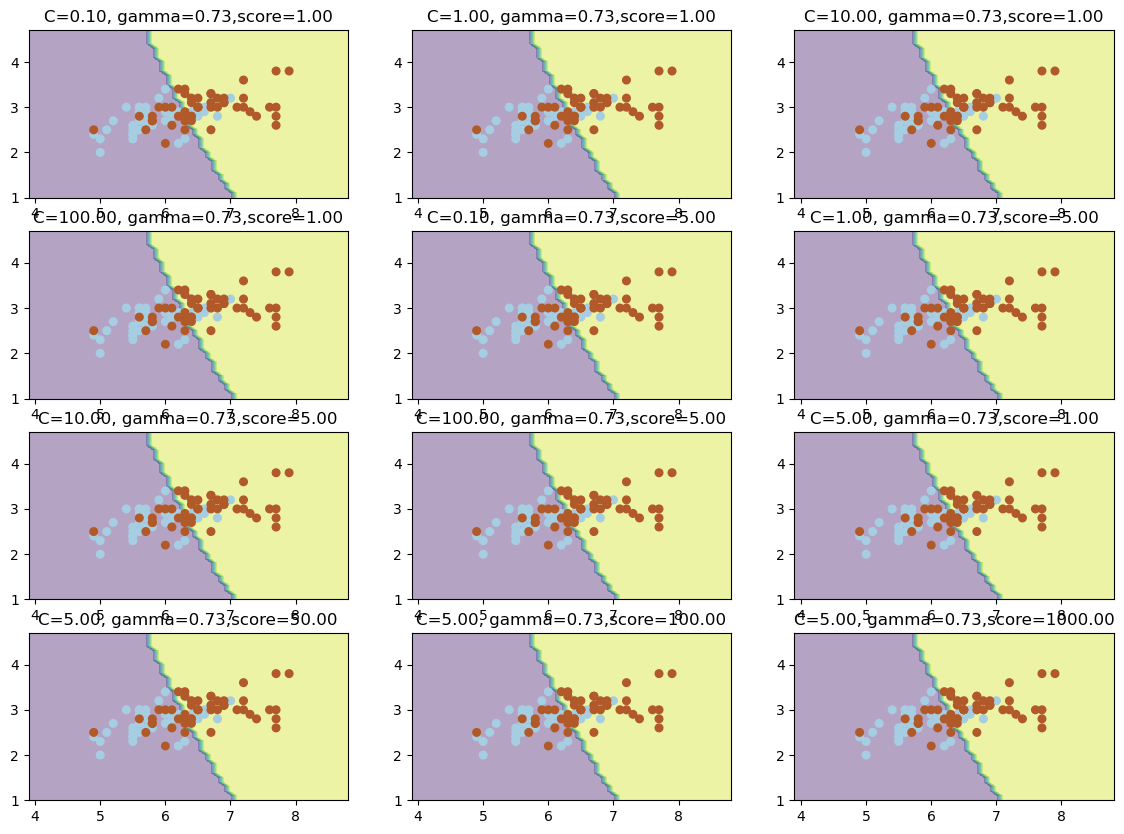

In [25]:
# 数据可视化
# 绘制分割超平面
import matplotlib.pyplot as plt
#分类器
clf_params=(('rbf',1,0.1),('rbf',1,1),('rbf',1,10),('rbf',1,100),
            ('rbf',5,0.1),('rbf',5,1),('rbf',5,10),('rbf',5,100),
            ('rbf',1,5),('rbf',50,5),('rbf',100,5),('rbf',1000,5),)
fig2 = plt.figure(figsize=(14, 10))
for i, params in enumerate(clf_params):
    plt.subplot(4, 3, i+1)
    draw_svm(params)
plt.show()

